Tutorial 3. Sentiment analysis on the Twitter textual data
===

3.1 Introduction and setup
---

The purpose of this tutorial is to guide you through the construction of a very basic sentiment analysis tool.
We aim at detecting the polarity of a given text: is the attitude of the writer **positive** or **negative**.
Texts such as `'This view is amazing'` are considered positive, whereas text as `'This view is horrible'` will be considered negative. Such a tool can be useful, for example, to detect if products reviews are positive or negative.
The tool that we will construct starts from a very simple hypothesis: *it a text contains mainly positive words, then the general sentiment is positive; if the text contains mainly negative words, then the sentiment is negative*.

**Step 1:** For this purpose, we will use a sentiment lexicon: a list of words together with their polarity (*i.e.*, positive or negative).
We use the lexicon described in 
`Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, Washington, USA.`,
and available for [download here](http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html).  
  
In order to speed up this tutorial, we have downloaded the lexicon and pre-treated it (*i.e.*, we removed the header).
Save into your current folder the two lexicon files: [sentiment-lexicon-positive-words.txt](http://rizoiu.eu/sna-lab-ipython/sentiment-lexicon-positive-words.txt) and [sentiment-lexicon-negative-words.txt](http://rizoiu.eu/sna-lab-ipython/sentiment-lexicon-negative-words.txt).
Please note that some words in the lexicon are intentionally misspelled in order to accommodate common errors found in social media.

**Step 2:** We will require to verify if the words in target text belong to the negative or to the positive lexicon.
For this, we use the Python's powerful [NLTK (Natural Language Toolkit) module](http://www.nltk.org/).
NLTK contains a comprehensive number of tools needed for natural text processing: tokenizers, stemmers, lemmatizers *etc.*
In the following, we will use a tokenizer (a tool which splits natural language text into tokens - words) and a lemmatizer (a tool to reduce a word to its lemma - singular, masculine form for nouns, infinitive for verbs *etc.*).

If you followed [the installation instructions](http://nbviewer.ipython.org/url/rizoiu.eu/sna-lab-ipython/install-instructions.ipynb), the *nltk* module should already be installed, alongside with the additional required data that the tokenizer requires.
If you are outside of ANU's network, you can download this additional data by executing the code below.
A window will open letting you chose what to download:
* Select the "Corpora" tab, scroll down and select "wordnet";
* Select the "Models" tab, scroll down and select the "punkt".
This will require a download of 23.3MB.  

**OBS:** inside the ANU's network, you must install the additional data as shown in the [the installation instructions](http://nbviewer.ipython.org/url/rizoiu.eu/sna-lab-ipython/install-instructions.ipynb).

In [4]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

We are now set up to start building our sentiment analysis tool.

3.2 Constructing a basic sentiment analysis tool
---

We start by initializing a set of positive and negative examples to work with. The examples were taken from [this sentiment analysis tutorial](http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/).

In [1]:
pos_tweets = [ 'I love this cars',
               'This view is amazing',
	           'I feel great this morning',
	           'I am so excited about the concert',
	           'He is my best friend']

neg_tweets = ['I do not like this car',
              'This view is horrible',
              'I feel tired this morning',
              'I am not looking forward to the concert',
              'He is my worst enemy']

Next, we import the positive and the negative lexicons.
The format of the lexicon files is one word per line.
As we will lemmatize the words in the target text, we apply the same treatment to the words in the lexicon.

In [2]:
from nltk.stem.wordnet import WordNetLemmatizer

# define the lemmatizer
lmtzr = WordNetLemmatizer()

# read the positive and negative lexicon in lists of words
positive_words = [lmtzr.lemmatize(line.strip().decode('utf-8')) for line in open('sentiment-lexicon-positive-words.txt')]
negative_words = [lmtzr.lemmatize(line.strip().decode('utf-8')) for line in open('sentiment-lexicon-negative-words.txt')]

print "We have {:d} positive words and {:d} negative words.".format(len(positive_words), len(negative_words))

We have 2006 positive words and 4783 negative words.


We are going to preprocess the target texts:
* the text is split into tokens (words) by using **nltk**;
* each token is transformed to lowercase;
* tokens are lemmatized;
* tokens with fewer than 3 characters are filtered out, since there are likely to be errors or non-sentiment related words.

In [5]:
for words in pos_tweets + neg_tweets:
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(words.decode('utf-8'))
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]
    
    # print the tweet
    print tweet

[u'love', u'this', u'car']
[u'this', u'view', u'amazing']
[u'feel', u'great', u'this', u'morning']
[u'excited', u'about', u'the', u'concert']
[u'best', u'friend']
[u'not', u'like', u'this', u'car']
[u'this', u'view', u'horrible']
[u'feel', u'tired', u'this', u'morning']
[u'not', u'looking', u'forward', u'the', u'concert']
[u'worst', u'enemy']


In the end, for each text we compute a score:
* if a given word is in the positive list, we add one to the score;
* if the word is in the negative list, we subtract one from the score.

In the end, if the score is greater than zero, the text is considered as positive. 
If it is less than zero, it is considered negative. 
If it is zero, the text is considered neutral.

The following code finds and outputs the positive and negative words in the texts. 
It computes the score and prints it out for each text.

In [16]:
# define the function that computes the sentiment score
# define the function that computes the sentiment score
def get_sentiment_score(text):
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(text)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]

    # calculate the sentiment score
    score = 0
    flag = 0
    for word in tweet:
        
        if word in positive_words:
            if flag == 1:
                flag = 0
                score = score - 1
            else:
                score = score + 1
        if word in negative_words:
            if flag == 1:
                flag = 0
                score = score + 1
            else:
                score = score - 1
        if word == "not":
            flag = 1
    return score

# apply it on our example tweets
for words in pos_tweets + neg_tweets:
    print "Tweet: '{:s}', score: {:d}".format(words, get_sentiment_score(words))
    print "------------------------------------"

Tweet: 'I love this cars', score: 1
------------------------------------
Tweet: 'This view is amazing', score: 1
------------------------------------
Tweet: 'I feel great this morning', score: 1
------------------------------------
Tweet: 'I am so excited about the concert', score: 1
------------------------------------
Tweet: 'He is my best friend', score: 1
------------------------------------
Tweet: 'I do not like this car', score: -1
------------------------------------
Tweet: 'This view is horrible', score: -1
------------------------------------
Tweet: 'I feel tired this morning', score: -1
------------------------------------
Tweet: 'I am not looking forward to the concert', score: 0
------------------------------------
Tweet: 'He is my worst enemy', score: -2
------------------------------------


We observe that all the positive examples have been detected as positive, because they contain positive words.
Only 3 out of 5 negative examples were detected as such.
In the case of *'I do not like this car'*, the word **like** is in the positive list, but in the text it is prefixed by **not** which changes the polarity.
**like** is positive, but **not like** is negative.
*'I am not looking forward to the concert'* does not contain any positive or negative words, even if the expression **not looking forward** has a negative connotation.
This shows the limitations of our naive approach.
These special cases should be taken into account.

3.3 Applying the analysis on real data: tasks for you
---

**#3.1:** Use the `get_sentiment_score(text)`, the sentiment scoring function defined before, and calculate the sentiment polarity of the tweets in the Twitter JSON dataset used in [tutorial 2](http://nbviewer.ipython.org/url/rizoiu.eu/sna-lab-ipython/tutorial-2-construct-network-real-twitter-dump.ipynb). 
The dataset is [available to download here](http://rizoiu.eu/sna-lab-ipython/twitter-dump.json.bz2). 
Print the text of the 10 most positive and the 10 most negative tweets. 
We consider that a tweet $t_1$ is more positive than another tweet $t_2$ when score of the former is higher than the score of the latter ($score(t_1) > score(t_2)$). 
Similarly, a tweet $t_1$ is more negative than $t_2$ when $score(t_1) < score(t_2)$.  
**HINT:** Load the tweets one by one as seen in tutorial 2 and extract the text, which is found in the field *text* of each tweet.

In [17]:
import bz2, json
import operator

# open the bzipped dataset
reader = bz2.BZ2File("./twitter-dump.json.bz2", mode="r")

tweetToScore = {}
# go line by line (ergo, tweet by tweet)
for line in reader:
    # load the JSON object from the read line
    jobj = json.loads(line)
    # get the text of the tweet
    text = jobj[u'text']
    # calculate sentiment score of the tweet
    score = get_sentiment_score(text)
    # map tweets to its sentiment score
    tweetToScore[text] = score
# sort the tweets from lower score to higher
tweetList = sorted(tweetToScore.iteritems(), key=operator.itemgetter(1))

print "--- The 10 most positive tweets ---"
for i in xrange(10):
    print str(i+1)+". "+tweetList[-i-1][0].encode("utf-8")
print

print "--- The 10 most nagative tweets ---"
for i in xrange(10):
    print str(i+1)+". "+tweetList[i][0].encode("utf-8")

--- The 10 most positive tweets ---
1. It's perfect, Amazing, fantastic, WOW!💜I love u💕 http://t.co/dKDHDhdOgF
Please follow me gorgeous!👑@ArianaGrande 
#WatchProblemOnVEVO x56
2. It's perfect, Amazing, fantastic, WOW!💜I love u💕 http://t.co/dKDHDhdOgF
Please follow me gorgeous!👑@ArianaGrande 
#WatchProblemOnVEVO x88
3. It's perfect, Amazing, fantastic, WOW!💜I love u💕 http://t.co/dKDHDhdOgF
Please follow me gorgeous!👑@ArianaGrande 
#WatchProblemOnVEVO x87
4. RT @PerrieAndSmile: It's perfect, Amazing, fantastic, WOW!💜I love u💕 http://t.co/dKDHDhdOgF
Please follow me gorgeous!👑@ArianaGrande 
#Watc…
5. Watch @ArianaGrande and @iggyazalea Problem Official music video here 👩💭🎬 http://t.co/hSpUIH9eK6 love love love love love love love 💖💖💖💖😂
6. RT @ArianaGrande: glad u love it.....👩 love u more “@indiggynado: @ArianaGrande it is PERFECT , i love you 💕
http://t.co/ji6ETHIFuf #WatchP…
7. RT @WeirdLikeSwift: Wow! @ArianaGrande You did a great job! Im so proud of you loves!  http://t.co/dSkFOaAVat

**#3.2:** Based on the scores calculated in **Assignment #3.1**, determine the 3 most positive users. A user $u_1$ is more positive than a user $u_2$ if the dataset contains more positive tweets emitted by $u_1$ than tweets emitted by $u_2$. Formally:
$$ positivity(u_1) > positivity(u_2) \iff \left| \left\{ t \, \middle| \, author(t) = u_1 \wedge score(t) > 0 \right\} \right| > \left| \left\{ t \, \middle| \, author(t) = u_2 \wedge score(t) > 0 \right\} \right|$$

In [15]:
import operator
from itertools import islice

# open the bzipped dataset
reader = bz2.BZ2File("./twitter-dump.json.bz2", mode="r")

# construct a list of required data
tweetList = []
for line in reader:
    jobj = json.loads(line)
    text = jobj[u'text']
    # calculate sentiment score of the tweet
    score = get_sentiment_score(text)
    if score != 0:
        userId = jobj[u'user'][u'id']
        # append to list as a tuple
        tweetList.append((text, score, userId))

# map user id to number of positive tweets
userToPositives = {}
for tweet in tweetList:
    score = tweet[1]
    if score > 0:
        userId = tweet[2]
        # in some cases user has multiple attributes as id
        if isinstance(userId, dict):
            userId = userId.values()[0]
            
        if not userToPositives.has_key(userId):
            userToPositives[userId] = 0
        userToPositives[userId] += 1

userToPositives = sorted(userToPositives.iteritems(), key=operator.itemgetter(1), reverse=True)
list(islice(userToPositives, 3))

[(1243188937, 28), (1601537689, 25), (u'2229663685', 22)]

**#3.3:** 
We have discussed earlier that our system is fragile to negations: it will score the expression *not beautiful* as positive because it only detects the word beautiful as positive. 
More generally, we consider that the token **not** changes the polarity of a given token: **not beautiful** becomes negative, while **not bad** becomes positive.  
Modify the function `get_sentiment_score(text)` to detect the changes of polarity due to the token **not**.

In [ ]:
# negation on all words after "not untill next pouncuation
def get_sentiment_score(text):
    # list of pouncuations in English
    pouncuation = [",", ".", ";", "!", "(", ")", ":"]
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(text)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]

    # calculate the sentiment score
    score = 0
    # the nagation value is flipped every time a "not" is encountered
    neg = 1
    for word in tweet:
        if word == "not":
            neg = -neg
        elif word in pouncuation:
            neg = 1
        else:
            if word in positive_words:
                score = score + neg
            if word in negative_words:
                score = score - neg
    return score

Bonus assignments questions
---
Bonus assignment questions earn you extra marks if you solve this assignment correctly, no penalty is inflicted if you do not solve it. 
Note that the total grade of SMA assignments cannot exceed 10 points, therefore the bonus point can only be used to compensate for another question which you did not solve correctly.

**Bonus #1.** 
Based on the scores calculated in **Assignment #3.1**, plot the temporal evolution of the counts of positive and negative tweets. The date a tweet was emitted is found in the field *created_at*. 
Divide the temporal extent of your dataset into 100 timeslices. 
The temporal extent of the dataset is from the creation date of the first tweet to the creation date of the last tweet. 
Count how many positive and how many negative tweets you have in each timeslice. 
Plot these counts on a graphic resembling this one:  
![caption](files/desired-plot.png)  
**HINT:** the graphic above is not based on real data. Your actual curves might **NOT** look like this one. Its purpose is just to show you the expected form of the graphic.

In [ ]:
import bz2, json
import matplotlib.pyplot as plt
import datetime
from dateutil import parser

# open the bzipped dataset
reader = bz2.BZ2File("./twitter-dump.json.bz2", mode="r")

# construct a list of tweet score and date
tweetList = []
for line in reader:
    jobj = json.loads(line)
    text = jobj[u'text']
    # calculate sentiment score of the tweet
    score = get_sentiment_score(text)
    if score != 0:
        date =  parser.parse(jobj[u'created_at'][u'$date'])
        # append to list as a tuple
        tweetList.append((score, date))

# get the date range
randomDate = tweetList[0][1]
max_date = randomDate
min_date = randomDate
for tweet in tweetList:
    date = tweet[1]
    if date < min_date:
        min_date = date
    if date > max_date:
        max_date = date

# map each date interval to number of +/- tweets
interval = (max_date-min_date)/100
stats = {}
for i in xrange(100):
    # true for positive, false for negative
    stats[i] = {True:0, False:0}

for tweet in tweetList:
    score = tweet[0]
    date = tweet[1]
    key = 0
    s = min_date + interval
    while s<date:
        s += interval
        key += 1
    stats[key][bool(score)] += 1

# draw the diagram
x_axis = []
y_pos = []
y_neg = []
for i in xrange(100):
    x_axis.append(i+1)
    y_pos.append(stats[i][True])
    y_neg.append(stats[i][False])
plt.plot(x_axis, y_pos)
plt.plot(x_axis, y_neg)
plt.show()

**Bonus #2: Polarized communities** We want to know if there are polarized communities in our social graph. Are there closely linked groups of users who have similar sentiment polarities? We calculate the sentiment polarity of a user as the numbre of positive tweets emitted, from which we substract the number of negative tweets. Formally:
$$sentiment\_polarity(u) = \left| \left\{ t \, \middle| \, author(t) = u \wedge score(t) > 0 \right\} \right| - \left| \left\{ t \, \middle| \, author(t) = u \wedge score(t) < 0 \right\} \right| \enspace.$$  
To visually detect the polarized communities, we want to plot the same graph as in [tutorial 1](http://nbviewer.ipython.org/url/rizoiu.eu/sna-lab-ipython/tutorial-1-construct-social-graph.ipynb) at *Step 3*, but with the colors of nodes representing their polarity: `blue` for a negative polarity and `red` for a positive polarity. 
Are nodes colored similarly clustered close together?

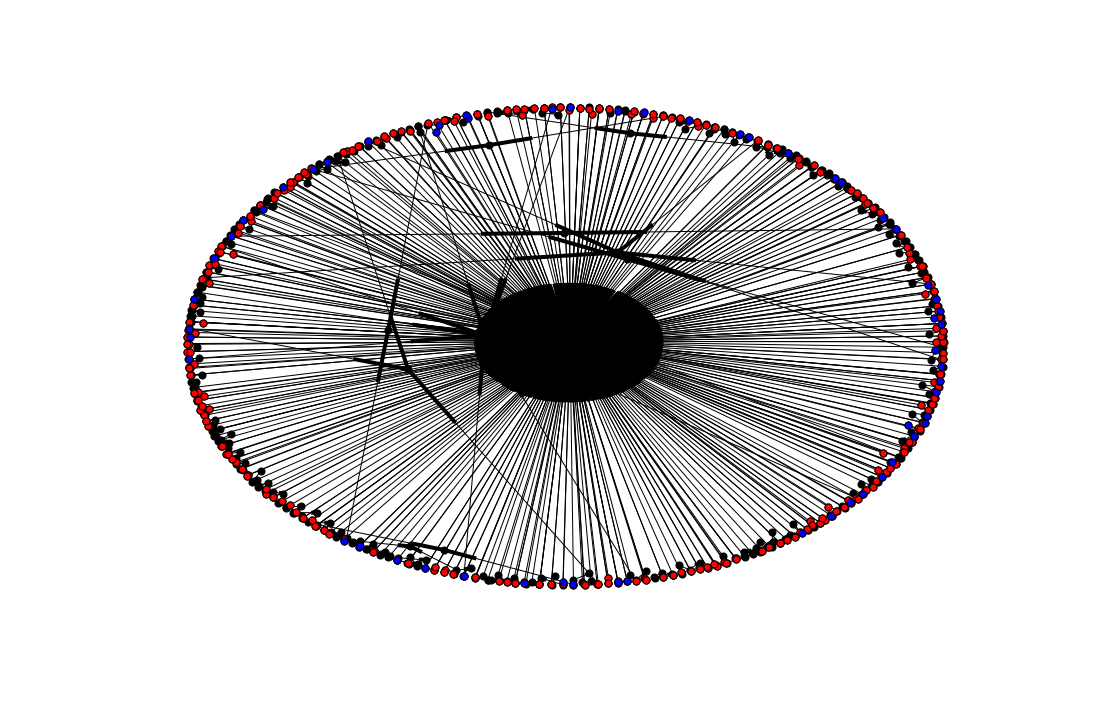

In [18]:
import bz2, json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

reader = bz2.BZ2File("./twitter-dump.json.bz2", mode="r")
DG = nx.DiGraph()

def getId(user_id):
    if isinstance(user_id, dict):
        return int(user_id.values()[0])
    else:
        return int(user_id)

# list of +/- tweets
positive_user=[]
negative_user=[]
tweetList = {}

for line in reader:
    # load the JSON object from the read line
    jobj = json.loads(line)
    
    reply_user_id = jobj[u'in_reply_to_user_id']
    if reply_user_id:
        # get user id that the tweet replies to
        reply_user_id = getId(reply_user_id)
        # get user id of the tweet
        user_id = getId(jobj[u'user'][u'id'])
    
        #get text of the tweet 
        text = jobj[u'text']
        if text:
            score = get_sentiment_score(text)
            if score != 0:
                if user_id not in tweetList:
                    tweetList[user_id] = 0
                tweetList[user_id] += score/abs(score)
                
        if user_id not in DG:  
            DG.add_node(user_id)
            
            if user_id in tweetList:
                if tweetList[user_id] < 0:                
                    negative_user.append(user_id)
                else: 
                    positive_user.append(user_id)
            
        if reply_user_id not in DG:  
            DG.add_node(reply_user_id)
        
        # add edge between two users
        DG.add_edge(user_id, reply_user_id)

# determine the spring layout
layout = nx.spring_layout(DG)

# draw the graph
plt.figure(figsize=(19,12))
plt.axis('off')

nx.draw_networkx_nodes(DG, layout, node_size=50, node_color='black')
nx.draw_networkx_nodes(DG.subgraph(positive_user), layout, node_size=50, node_color='r')
nx.draw_networkx_nodes(DG.subgraph(negative_user), layout, node_size=50, node_color='b')
nx.draw_networkx_edges(DG, layout, arrows=True)